In [42]:
import matplotlib.pyplot as plt, argparse, numpy as np, math, sys, copy
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage import io
from collections import defaultdict
import SPHC as sphc

In [53]:
imagePath = '385039.jpg'

#SLIC Parameters:
numSegments = 400  # How many superpixels to start with - input for SLIC function
Sigma = 5 # This parameter controls superpixel shape. Higher values make superpixels more square.

#SPHC Parameters:
segmentsToMerge = 3 # How many superpixels to merge based on color similarity
distance_limit = .5 # Limits which segments get merged based on their difference in average color

In [54]:
image = img_as_float(io.imread(imagePath))
SLICsegm_grid = slic(image, n_segments = numSegments, sigma = Sigma)

Initiating Segment Attributes...
Merging Segments...
4 segments merged - final


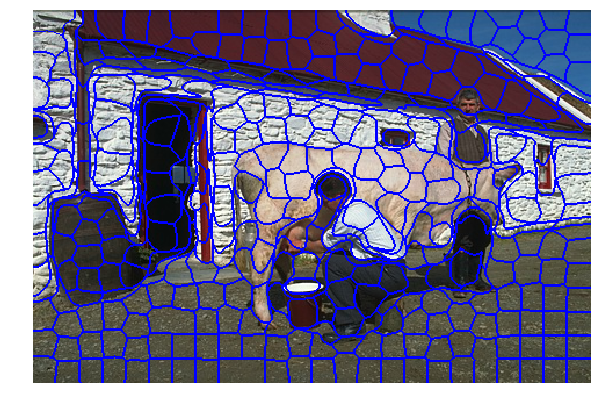

Initiating Segment Attributes...
Merging Segments...
24 segments merged - final


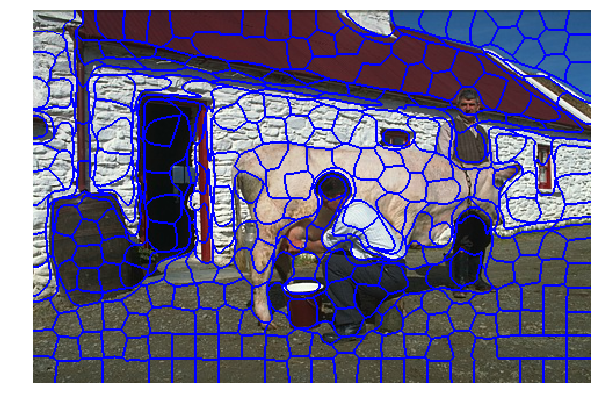

Initiating Segment Attributes...
Merging Segments...
44 segments merged - final


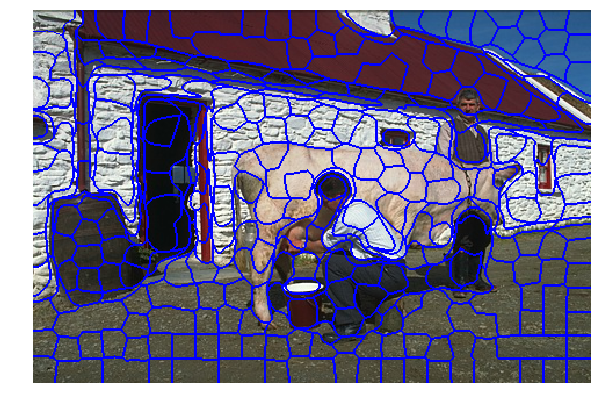

Initiating Segment Attributes...
Merging Segments...
64 segments merged - final


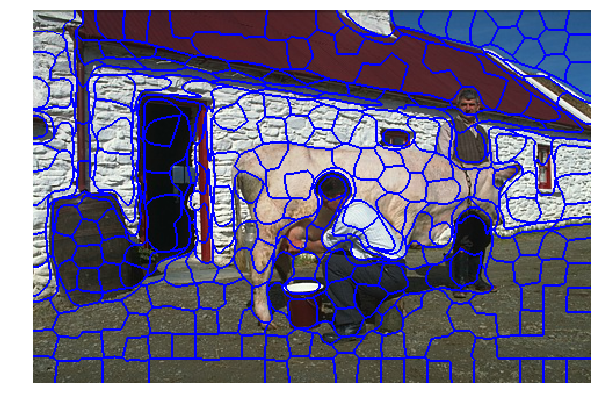

Initiating Segment Attributes...
Merging Segments...
84 segments merged - final


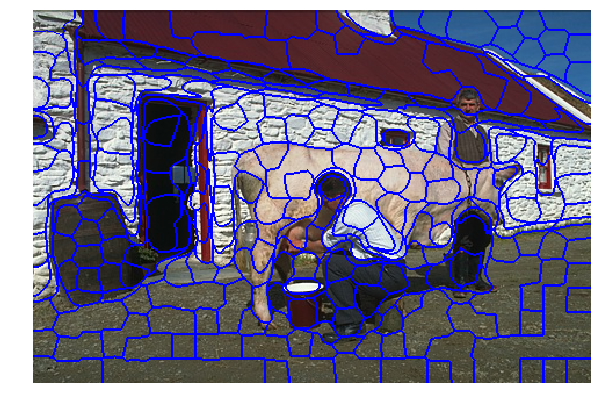

Initiating Segment Attributes...
Merging Segments...
104 segments merged - final


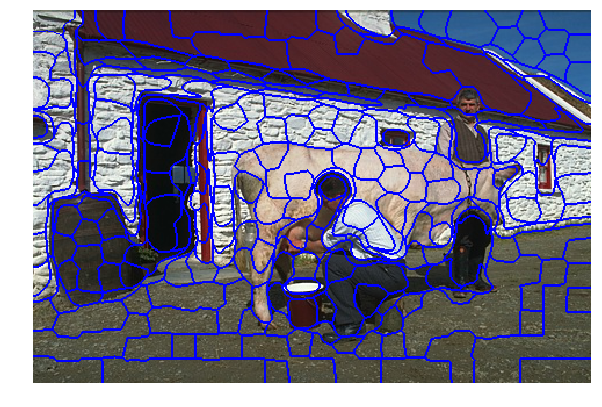

Initiating Segment Attributes...
Merging Segments...
124 segments merged - final


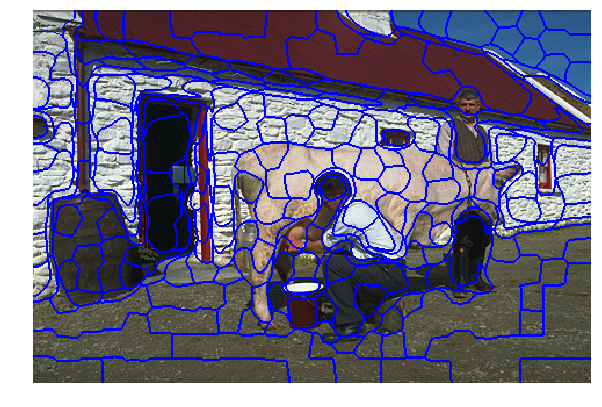

Initiating Segment Attributes...
Merging Segments...
144 segments merged - final


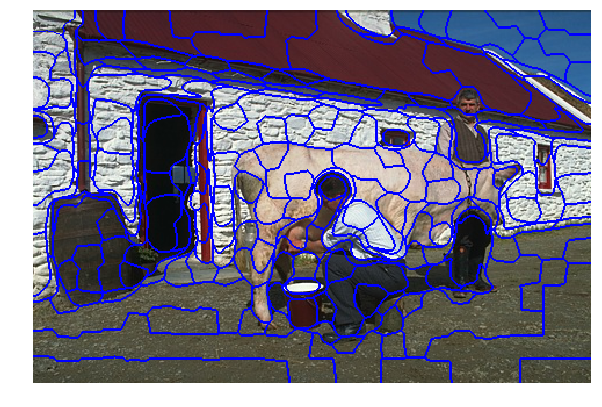

Initiating Segment Attributes...
Merging Segments...
164 segments merged - final


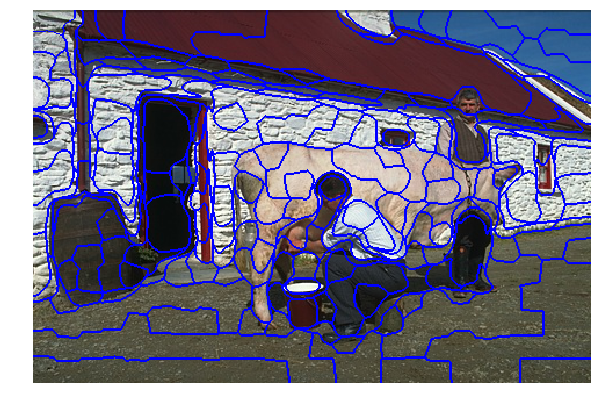

Initiating Segment Attributes...
Merging Segments...
184 segments merged - final


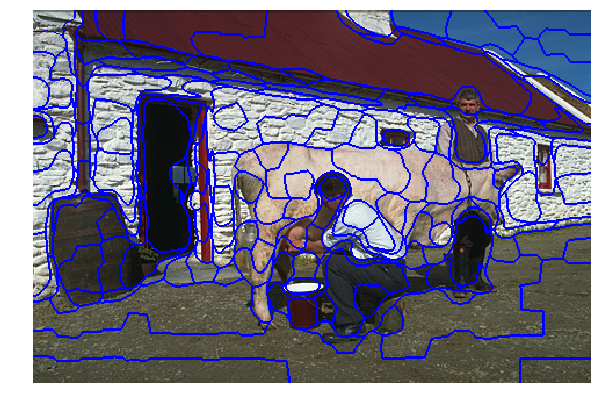

Initiating Segment Attributes...
Merging Segments...
204 segments merged - final


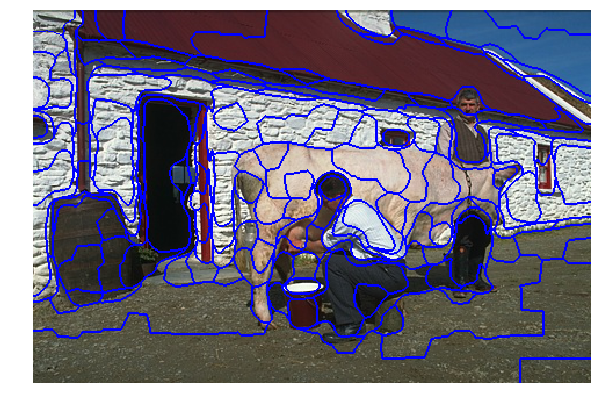

Initiating Segment Attributes...
Merging Segments...
224 segments merged - final


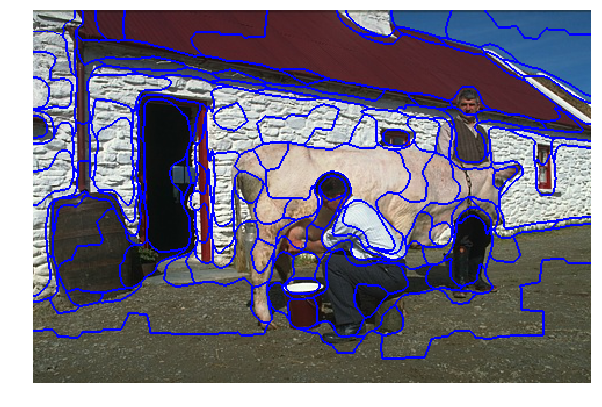

Initiating Segment Attributes...
Merging Segments...
244 segments merged - final


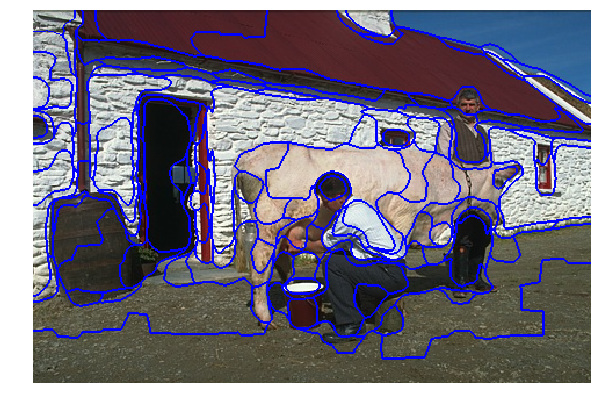

Initiating Segment Attributes...
Merging Segments...
264 segments merged - final


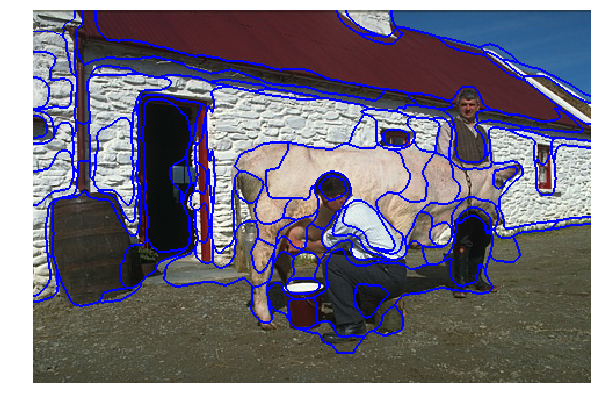

Initiating Segment Attributes...
Merging Segments...
284 segments merged - final


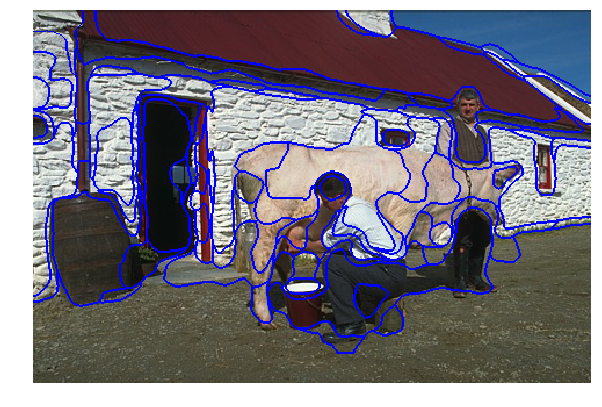

In [56]:
for seg in range(segmentsToMerge, segmentsToMerge+300, 20):
    SPHCsegm_grid = sphc.getSPHCsegments(SLICsegm_grid
                                    , image
                                    , numToMerge = seg #segmentsToMerge
                                    , max_dist = distance_limit)
    
    fig = plt.figure("%d Segments Merged" % seg, figsize = (10,10))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(mark_boundaries(image, SPHCsegm_grid, color=(0,0,1)))
    plt.axis("off")
    plt.show()